Dieses Teil des Prozess mach die Data Analysts oder Data Scientist hauptsächlich.
Dieses NoteBook is basiert auf die Infos und die Anleitungen aus dem Webseite:

https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/


## TOC:
* [Install and load packages](#install-and-load-packages)
* [Data Explorations & Feature Engineering](#data-explorations-feature-engineering)
* [Model Training and hyperparameter tuning](#model-training-and-hyperparameter-tuning)

# Install and Load Packages

In [2]:
!pip install -r requirements.txt

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sb

import mlflow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [6]:
!python3 --version

Python 3.10.6


# Data Explorations & Feature Engineering

In [7]:
df = pd.read_csv('winequality-red.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [8]:
# type of data present in each of the columns present in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
#descriptive statistical measures of the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# Let’s impute the missing values by means as the data present in the different columns are continuous values.
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

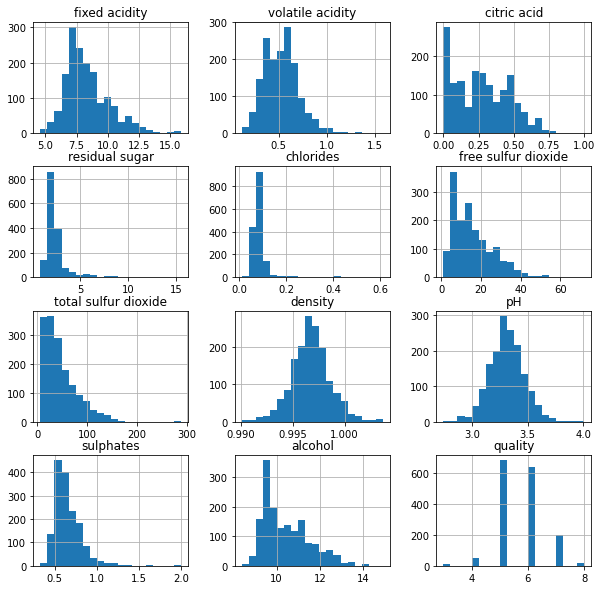

In [12]:
# Plotting histogram to visualise the distribution of the data
df.hist(bins=20, figsize=(10, 10))
plt.show()

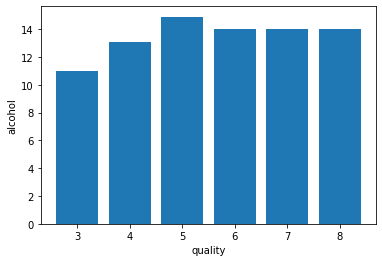

In [13]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [14]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() , annot=True, cmap = 'coolwarm',cbar=True)
plt.show()

NameError: name 'sb' is not defined

<Figure size 864x864 with 0 Axes>

In [15]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [16]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [17]:
# Plot quality classification 
      
df['quality'].value_counts()
      
plt.figure(num=None)
sb.countplot(data = df, x = 'quality', saturation=0.5)
plt.title("Types of Wine")
plt.show()

NameError: name 'sb' is not defined

<Figure size 432x288 with 0 Axes>

In [18]:
#df = df.drop('total sulfur dioxide', axis=1)

In [19]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [20]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  best quality  
0      9.4        5             0  
1      9.8    

In [21]:
#df.replace({'white': 1, 'red': 0}, inplace=True)

In [22]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

X_train, X_test, y_train, y_test = train_test_split(
	features, target, test_size=0.2, random_state=40)

X_train.shape, X_test.shape


((1279, 11), (320, 11))

In [23]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  best quality  
0      9.4        5             0  
1      9.8    

# Model Training and hyperparameter tuning

In [24]:
# Data processing and Model training for Logistic Regression
solver='lbfgs'
class_weight='balanced'
model_logreg = LogisticRegression(solver=solver, multi_class ='auto', class_weight=class_weight)
model_logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [25]:
# Calculate predictions
train_preds = model_logreg.predict(X_train)
val_preds = model_logreg.predict(X_test)


print('Logistic Regression:')
training_accuracy = metrics.accuracy_score(y_train, train_preds)
val_accuracy=metrics.accuracy_score(y_test, val_preds)
print(f'Training Accuracy: {training_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Logistic Regression:
Training Accuracy: 0.7334
Validation Accuracy: 0.7844


In [26]:
# Validation
y_pred = model_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The precision of the model: {:.2f}%".format(accuracy * 100))

The precision of the model: 78.44%


In [27]:
# Defining confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualizing confusion matrix

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

NameError: name 'sb' is not defined

In [28]:
# Print the classification report for the best performing model.
print(metrics.classification_report(y_test,model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       147
           1       0.82      0.77      0.80       173

    accuracy                           0.78       320
   macro avg       0.78      0.79      0.78       320
weighted avg       0.79      0.78      0.78       320



In [29]:
# Store Model and its dependencies on MLFlow
# mlflow.set_tracking_uri(uri="http://mlflow-auth-tracon-xxiv-mbahmani-0.apps.ocp.solutioncenter-munich.de")
mlflow.set_tracking_uri("http://127.0.0.1:8080")
mlflow.set_experiment("wine quality classification")
with mlflow.start_run():
    
    # store model's parameters
    mlflow.log_param("solver", solver)
    mlflow.log_param("class_weight", class_weight)
    
    # store model's metrices
    mlflow.log_metric("Training Accuracy", training_accuracy)
    mlflow.log_metric("Validation Accuracy", val_accuracy)

    # store model
    mlflow.sklearn.log_model(
        sk_model=model_logreg,
        artifact_path="model_logreg",
        registered_model_name="ElasticnetWineModel",
    )

2025/01/17 14:24:49 INFO mlflow.tracking.fluent: Experiment with name 'wine quality classification' does not exist. Creating a new experiment.
2025/01/17 14:24:54 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
Successfully registered model 'ElasticnetWineModel'.
2025/01/17 14:24:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: ElasticnetWineModel, version 1
Created version '1' of model 'ElasticnetWineModel'.


In [30]:
# Test Model Performance on 6 data points
df_test = pd.read_csv('winequality-red-test.csv')
df_test['best quality'] = [1 if x > 5 else 0 for x in df_test.quality]
#print(df_test.head())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6 non-null      float64
 1   volatile acidity      6 non-null      float64
 2   citric acid           6 non-null      float64
 3   residual sugar        6 non-null      float64
 4   chlorides             6 non-null      float64
 5   free sulfur dioxide   6 non-null      int64  
 6   total sulfur dioxide  6 non-null      int64  
 7   density               6 non-null      float64
 8   pH                    6 non-null      float64
 9   sulphates             6 non-null      float64
 10  alcohol               6 non-null      float64
 11  quality               6 non-null      int64  
 12  best quality          6 non-null      int64  
dtypes: float64(9), int64(4)
memory usage: 752.0 bytes


In [31]:
df_test_input = df_test.drop(['quality', 'best quality'], axis=1)

# Get the actual class of six input example
df_test_actual_class = df_test['best quality']

actual_class_test = pd.Series(df_test_actual_class)
#print(actual_class_test)

# Use the trained model to predict the class of six input example
prediction_class_test = pd.DataFrame(model_logreg.predict(df_test_input))
#print(prediction_class_test)
#model_testing_output = model_logreg.predict(df_test_input), columns=['Input ID','Predicted Class'])

# Put these information together
model_output = pd.concat([prediction_class_test, actual_class_test], axis=1, ignore_index=True)

#model_output.info()
model_output = model_output.set_axis(['Predicted Class', 'Actual Class'], axis='columns')
#model_output.info()

print(model_output)


   Predicted Class  Actual Class
0                0             0
1                1             0
2                0             0
3                1             1
4                1             1
5                1             1


In [32]:
df_test_input.to_json(orient ='split')

'{"columns":["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],"index":[0,1,2,3,4,5],"data":[[7.1,0.875,0.05,5.7,0.082,3,14,0.99808,3.4,0.52,10.2],[8.5,0.4,0.4,6.3,0.05,3,10,0.99566,3.28,0.56,12.0],[7.5,0.4,0.18,1.6,0.079,24,58,0.9965,3.34,0.58,9.4],[6.7,0.46,0.24,1.7,0.077,18,34,0.9948,3.39,0.6,10.6],[7.3,0.34,0.33,2.5,0.064,21,37,0.9952,3.35,0.77,12.1],[7.4,0.36,0.3,1.8,0.074,17,24,0.99419,3.24,0.7,11.4]]}'

In [33]:
df_test_input.to_json(orient ='values')

'[[7.1,0.875,0.05,5.7,0.082,3,14,0.99808,3.4,0.52,10.2],[8.5,0.4,0.4,6.3,0.05,3,10,0.99566,3.28,0.56,12.0],[7.5,0.4,0.18,1.6,0.079,24,58,0.9965,3.34,0.58,9.4],[6.7,0.46,0.24,1.7,0.077,18,34,0.9948,3.39,0.6,10.6],[7.3,0.34,0.33,2.5,0.064,21,37,0.9952,3.35,0.77,12.1],[7.4,0.36,0.3,1.8,0.074,17,24,0.99419,3.24,0.7,11.4]]'